In [2]:


!pip uninstall -y protobuf
!pip install protobuf==3.20.3


Found existing installation: protobuf 6.33.0
Uninstalling protobuf-6.33.0:
  Successfully uninstalled protobuf-6.33.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.1/162.1 kB 6.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 2.12.0 requires google-cloud-bigquery-storage<3.0.0,>=2.30.0, which is not installed.
opentelemetry-proto 1.37.0 requires protobuf<7.0,>=5.0, but you have protobuf 3.20.3 which is incompatible.
onnx 1.18.0 requires protobuf>=4.25.1, but you have protobuf 3.20.3 which is incompatible.
a2a-sdk 0.3.10 requires protobuf>=5.29.5, but you have protobuf 3.20.3 which is incompatible.
ray 2.51.1 requires click!=8.3.0,>=7.0, but you have click 8.3.0 which is incompatible.
bigframes 2.12.0 requires rich<14,>=12.4.4, but you have rich 14.2.0 which is incompatible.
tensorflow-metadata 1.17.2 requires protobuf>=4.25.2; pyth

In [4]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
yes_path = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes"
no_path  = "/kaggle/input/brain-mri-images-for-brain-tumor-detection/no"

X = []
y = []

for img in os.listdir(yes_path):
    img_path = os.path.join(yes_path, img)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (150, 150))
    X.append(image)
    y.append(1)  # Tumor

for img in os.listdir(no_path):
    img_path = os.path.join(no_path, img)
    image = cv2.imread(img_path)
    image = cv2.resize(image, (150, 150))
    X.append(image)
    y.append(0)  # No Tumor

X = np.array(X)
y = np.array(y)

X = X / 255.0   # Normalize

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [7]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150,150,3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1764953940.973105      47 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 15513 MB memory:  -> device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,828,481 (18.42 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

In [8]:
history = model.fit(
    X_train, y_train,
    epochs=10,
    validation_data=(X_test, y_test),
    batch_size=32
)

Epoch 1/10


I0000 00:00:1764953952.283741     126 service.cc:148] XLA service 0x7d6964006070 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1764953952.284337     126 service.cc:156]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
I0000 00:00:1764953952.591179     126 cuda_dnn.cc:529] Loaded cuDNN version 90300


5/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.6130 - loss: 0.8582

I0000 00:00:1764953955.506636     126 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


7/7 ━━━━━━━━━━━━━━━━━━━━ 8s 555ms/step - accuracy: 0.6235 - loss: 0.8222 - val_accuracy: 0.7451 - val_loss: 0.5561
Epoch 2/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8264 - loss: 0.4935 - val_accuracy: 0.7647 - val_loss: 0.4827
Epoch 3/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7514 - loss: 0.5521 - val_accuracy: 0.7647 - val_loss: 0.5640
Epoch 4/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.7926 - loss: 0.4974 - val_accuracy: 0.7647 - val_loss: 0.5186
Epoch 5/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8091 - loss: 0.4490 - val_accuracy: 0.7843 - val_loss: 0.4478
Epoch 6/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8078 - loss: 0.4310 - val_accuracy: 0.8039 - val_loss: 0.4362
Epoch 7/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8362 - loss: 0.3884 - val_accuracy: 0.8431 - val_loss: 0.4844
Epoch 8/10
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8441 - loss: 0.3621 - val_accuracy: 0.8824 - val_loss: 0.3995
Epoch 9/10

In [9]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)

print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 276ms/step
              precision    recall  f1-score   support

           0       1.00      0.71      0.83        24
           1       0.79      1.00      0.89        27

    accuracy                           0.86        51
   macro avg       0.90      0.85      0.86        51
weighted avg       0.89      0.86      0.86        51

Confusion Matrix:
[[17  7]
 [ 0 27]]


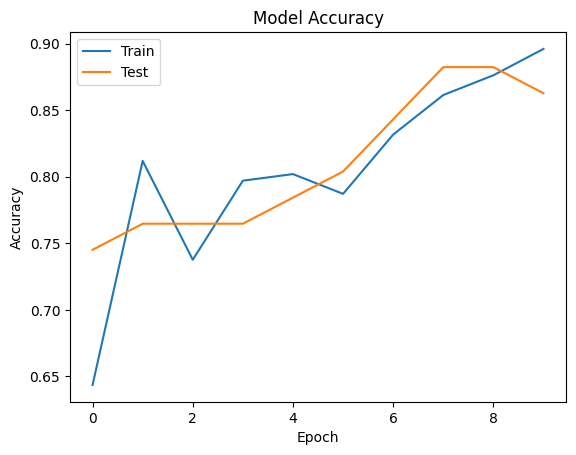

In [10]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'])
plt.show()

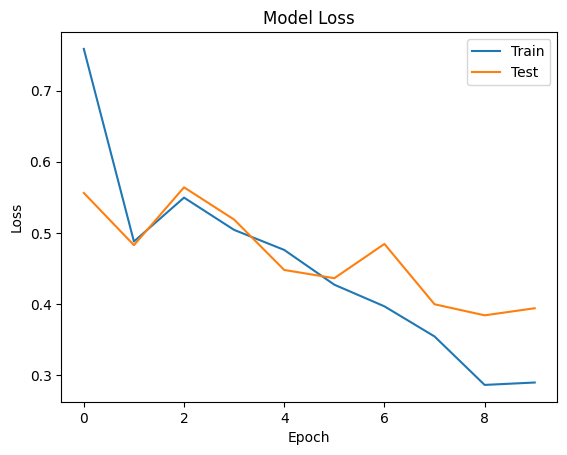

In [11]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'])
plt.show()


In [12]:

def predict_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150,150))
    img = img / 255.0
    img = np.reshape(img, (1,150,150,3))

    prediction = model.predict(img)

    if prediction[0][0] > 0.5:
        print("✅ Tumor Detected")
    else:
        print("✅ No Tumor Detected")

# Example Test Image
predict_image("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
✅ Tumor Detected


In [13]:
model.save("brain_tumor_model.h5")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Tumor Detected


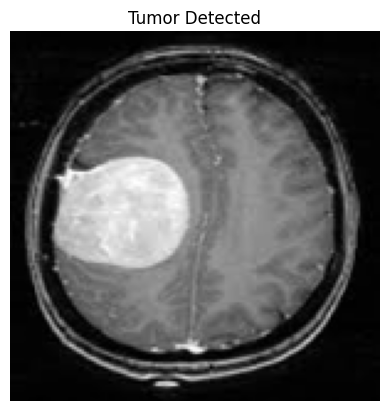

In [16]:
# =========================
# ✅ SINGLE IMAGE PREDICTION
# =========================

import cv2
import numpy as np
import matplotlib.pyplot as plt

def predict_single_image(image_path):
    img = cv2.imread(image_path)
    img = cv2.resize(img, (150,150))
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    img_norm = img / 255.0
    img_input = np.reshape(img_norm, (1,150,150,3))

    prediction = model.predict(img_input)[0][0]

    plt.imshow(img_rgb)
    plt.axis("off")

    if prediction > 0.5:
        plt.title("Tumor Detected")
        print("Tumor Detected")
    else:
        plt.title("No Tumor Detected")
        print("No Tumor Detected")

# ✅ TEST WITH A REAL IMAGE FROM DATASET
predict_single_image("/kaggle/input/brain-mri-images-for-brain-tumor-detection/yes/Y1.jpg")
